In [138]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
%cd '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc'

/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc


In [141]:
size=224

In [142]:
train_path = '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc'
valid_path = '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc'

In [143]:
#import os
#from PIL import Image
#import matplotlib.pyplot as plt

#main_folder_path = '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc'

#subfolders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

#for folder in subfolders:
#    folder_path = os.path.join(main_folder_path, folder)
#
 #   image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp'))]
#
 #   for image_file in image_files:
  #      image_path = os.path.join(folder_path, image_file)
#
 #       image = Image.open(image_path)
  #      plt.imshow(image)
   #     plt.title(image_file)
    #    plt.axis('off')
     #   plt.show()

In [144]:
inception = InceptionV3(input_shape=[size,size] + [3], weights='imagenet', include_top=False)

In [145]:
for layer in inception.layers:
    layer.trainable = False

In [146]:
folders = glob(train_path+'/*')

In [147]:
x = Flatten()(inception.output)

In [148]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [149]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_658 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_658   │ (None, 111, 111, 32)   │             96 │ conv2d_658[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_658            │ (None, 111, 111, 32)   │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_659 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_658[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_659   │ (None, 109, 109, 32)   │             96 │ conv2d_659[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_659            │ (None, 109, 109, 32)   │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_660 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_659[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_660   │ (None, 109, 109, 64)   │            192 │ conv2d_660[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_660            │ (None, 109, 109, 64)   │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_28          │ (None, 54, 54, 64)     │              0 │ activation_660[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_661 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_661   │ (None, 54, 54, 80)     │            240 │ conv2d_661[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_661            │ (None, 54, 54, 80)     │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_662 (Conv2D)  

 Total params: 22,109,990 (84.34 MB)

 Trainable params: 307,206 (1.17 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [150]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [151]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [152]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 97 images belonging to 6 classes.


In [153]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 97 images belonging to 6 classes.


In [154]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.1819 - loss: 8.8368 - val_accuracy: 0.5464 - val_loss: 15.7987
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.5151 - loss: 14.6440 - val_accuracy: 0.4845 - val_loss: 7.2067
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 0.5632 - loss: 4.7956 - val_accuracy: 0.7113 - val_loss: 2.2607
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.7012 - loss: 3.4841 - val_accuracy: 0.7629 - val_loss: 2.9179
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.8108 - loss: 2.1666 - val_accuracy: 0.8144 - val_loss: 1.3911
Epoch 10/

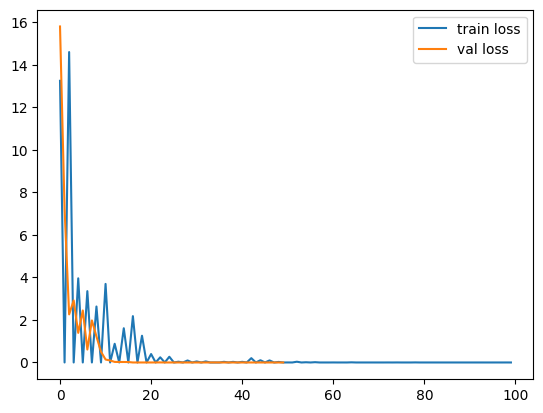

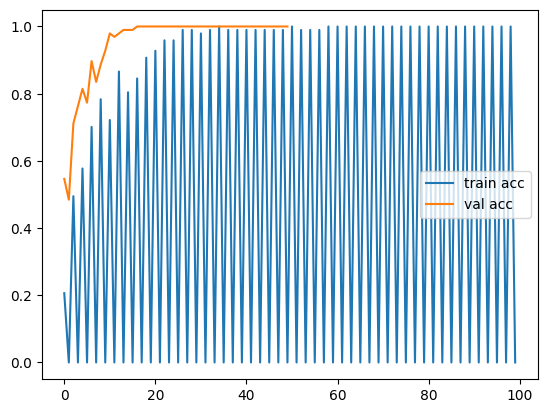

<Figure size 640x480 with 0 Axes>

In [155]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [156]:
from tensorflow.keras.models import load_model

model.save('sample_model.h5')

In [157]:
y_pred = model.predict(test_set)

3/4 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step


In [158]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [159]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [160]:
from tensorflow.keras.models import load_model

model=load_model('sample_model.h5')

In [162]:
img=image.load_img('/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc/Cognex/cog.jpg',target_size=(size,size))

In [163]:
x=image.img_to_array(img)
x=x/255

In [164]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [165]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.1931522 , 0.01083703, 0.46072698, 0.32423556, 0.00130039,
        0.00974779]], dtype=float32)

In [166]:
np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([2])

In [167]:
class_map = training_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [168]:
classes

[' Namenda',
 'Cognex',
 'Donepezil Hydrochloride',
 'Galantamine Razadyne',
 'Namzaric',
 'Rivastigmine Exelon']

In [169]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction
    print(prob[0])

    index = np.argmax(prediction)
    confidence = prob[0][index]


    if confidence >= 0.9:
        plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='green')
        plt.imshow(img_array)
    else:
        plt.title("Not Detected", size=18, color='red')
        plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
[3.71116908e-32 1.00000000e+00 6.76637815e-27 6.12267765e-24
 0.00000000e+00 1.00952664e-26]


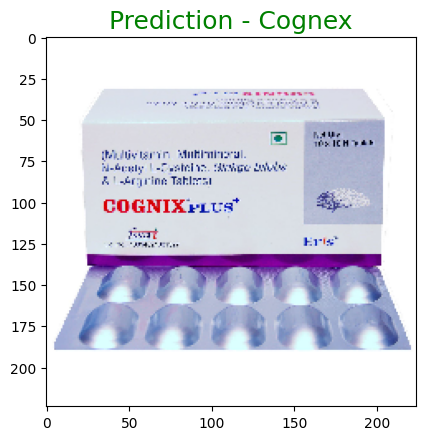

In [170]:
predict_image('/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc/Cognex/cog.jpg', model)

Saving cognex (1).jpg to cognex (1) (1).jpg
File uploaded: cognex (1) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
[5.7942801e-28 1.0000000e+00 8.6198523e-30 4.5032375e-27 2.8745314e-29
 5.9094020e-26]


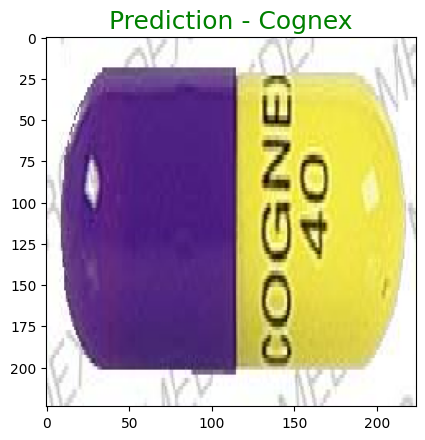

In [172]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File uploaded: {filename}')
    predict_image(filename, model)